In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 📌 **Business Understanding: Satellite Image Classification Project**

## 🔍 **Overview**
Satellite imagery is a powerful tool for understanding and managing land resources, urban expansion, and environmental change. However, extracting meaningful insights from these images requires significant time and expertise. By leveraging deep learning, we aim to automate the classification of satellite images into meaningful land cover categories, helping stakeholders make faster, data-driven decisions.

---


## 🧠 **Problem Statement**
Manual classification of satellite imagery is a slow and error-prone process, making it difficult for governments, urban planners, and environmental agencies to monitor land use and environmental changes efficiently. With the increasing volume of satellite data, there is a growing need for automated systems that can accurately and quickly categorize different land types from satellite images.

This project aims to develop an automated image classification model that can categorize satellite images into distinct land cover classes such as forest, agricultural land, water bodies, and residential areas.

---

## 🎯 **Objectives**
To build and deploy a machine learning model capable of:
- Automatically classifying satellite images into predefined categories
- Enabling data-driven decision-making in urban development and environmental monitoring
- Laying the foundation for a scalable, deployable application

---

## 📈 **Business Goals**
- **Urban Planning**: Identify and monitor expanding urban and industrial zones.
- **Agricultural Monitoring**: Track changes in crop fields and farming activities.
- **Environmental Monitoring**: Detect deforestation, water body shrinkage, or desertification.
- **Disaster Response**: Aid in rapid damage assessment after events like floods or wildfires.

---

## ✅ **Success Criteria**
- Achieve at least **85% classification accuracy** on validation data
- Ensure the model is lightweight enough for real-time inference
- Deploy the model in a user-friendly application (e.g., Streamlit) for use by non-technical stakeholders

In [ ]:
#loading the dataset folder path
data = "/content/drive/MyDrive/data"


In [ ]:
#Importing the relevant libraries

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# Data Preparation
img_height, img_width = 64, 64
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Training the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 905s 6s/step - accuracy: 0.6634 - loss: 0.6919 - val_accuracy: 0.8428 - val_loss: 0.3661
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.8281 - loss: 0.4069 - val_accuracy: 0.8464 - val_loss: 0.3189
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.8339 - loss: 0.3974 - val_accuracy: 0.8845 - val_loss: 0.3092
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.8728 - loss: 0.3041 - val_accuracy: 0.8419 - val_loss: 0.3792
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.8748 - loss: 0.2979 - val_accuracy: 0.8766 - val_loss: 0.2858
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - accuracy: 0.8881 - loss: 0.2697 - val_accuracy: 0.8481 - val_loss: 0.3510
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.8735 - loss: 0.3037 - val_accuracy: 0.8872 - val_loss: 0.3013
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.8782 - loss: 0.2

In [ ]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8163 - loss: 0.3968
Validation Loss: 0.3863
Validation Accuracy: 0.8321


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
val_data.reset()  # Reset to make sure predictions match order
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_labels))


              precision    recall  f1-score   support

      cloudy       0.25      0.21      0.23       300
      desert       0.23      0.29      0.25       226
  green_area       0.24      0.33      0.28       300
       water       0.29      0.18      0.22       300

    accuracy                           0.25      1126
   macro avg       0.25      0.25      0.24      1126
weighted avg       0.25      0.25      0.24      1126



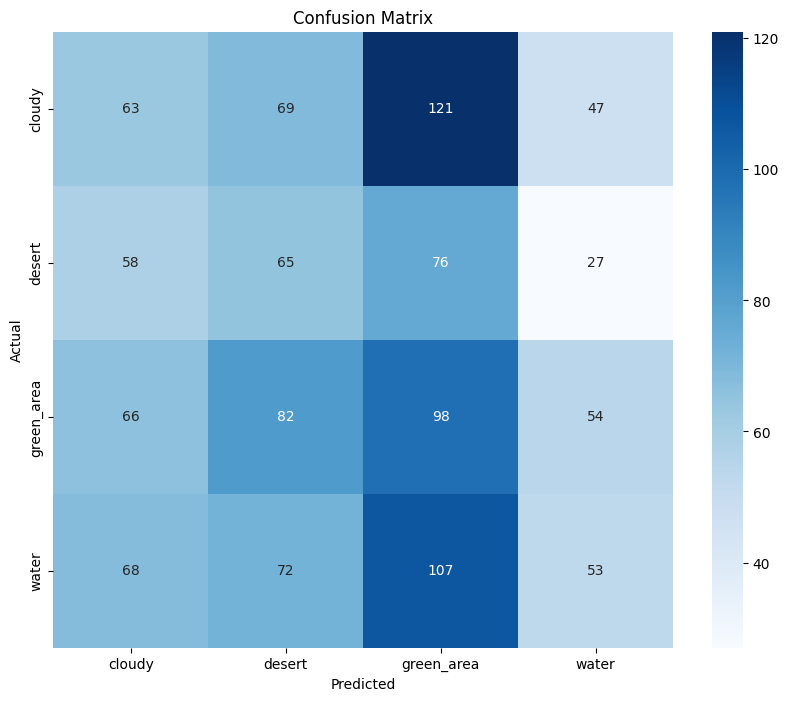

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Observations:**

Overall Performance: Similar to the previous matrix, there are correct classifications along the diagonal, but also significant misclassifications.

1. **True Positives (Correct Classifications):**

- 'cloudy': 63

- 'desert': 65

- 'green_area': 98

- 'water': 53

- The model classifies 'green_area' best (98 correct).

- The model classifies 'water' worst (53 correct).

2. **False Positives and False Negatives (Misclassifications):**

  **'cloudy' misclassifications:**

- 121 actual 'cloudy' were predicted as 'green_area' (highest single error).

- 69 actual 'cloudy' were predicted as 'desert'.

  **'desert' misclassifications:**

- 76 actual 'desert' were predicted as 'green_area'.

- 58 actual 'desert' were predicted as 'cloudy'.

  **'green_area' misclassifications:**

- 66 actual 'green_area' were predicted as 'cloudy'.

- 82 actual 'green_area' were predicted as 'desert'.

  **'water' misclassifications:**

- 107 actual 'water' were predicted as 'green_area'.

- 72 actual 'water' were predicted as 'desert'.

- 68 actual 'water' were predicted as 'cloudy'.





In [ ]:
# Dealing with overfitting
ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))

# Train with class weights
model.fit(train_data, validation_data=val_data, epochs=10, class_weight=class_weights)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9021 - loss: 0.2547 - val_accuracy: 0.8908 - val_loss: 0.2425
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.8773 - loss: 0.2789 - val_accuracy: 0.8650 - val_loss: 0.2863
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.9017 - loss: 0.2399 - val_accuracy: 0.9139 - val_loss: 0.2005
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.9203 - loss: 0.2187 - val_accuracy: 0.8730 - val_loss: 0.2996
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.8998 - loss: 0.2333 - val_accuracy: 0.9272 - val_loss: 0.1870
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.9216 - loss: 0.1999 - val_accuracy: 0.9076 - val_loss: 0.2178
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.9222 - loss: 0.2013 - val_accuracy: 0.9085 - val_loss: 0.2217
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.9312 - loss: 0

In [ ]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9071 - loss: 0.2082
Validation Loss: 0.1992
Validation Accuracy: 0.9005


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

val_data.reset()
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_labels))


              precision    recall  f1-score   support

      cloudy       0.30      0.29      0.29       300
      desert       0.15      0.17      0.16       226
  green_area       0.23      0.28      0.26       300
       water       0.26      0.20      0.23       300

    accuracy                           0.24      1126
   macro avg       0.24      0.23      0.23      1126
weighted avg       0.24      0.24      0.24      1126



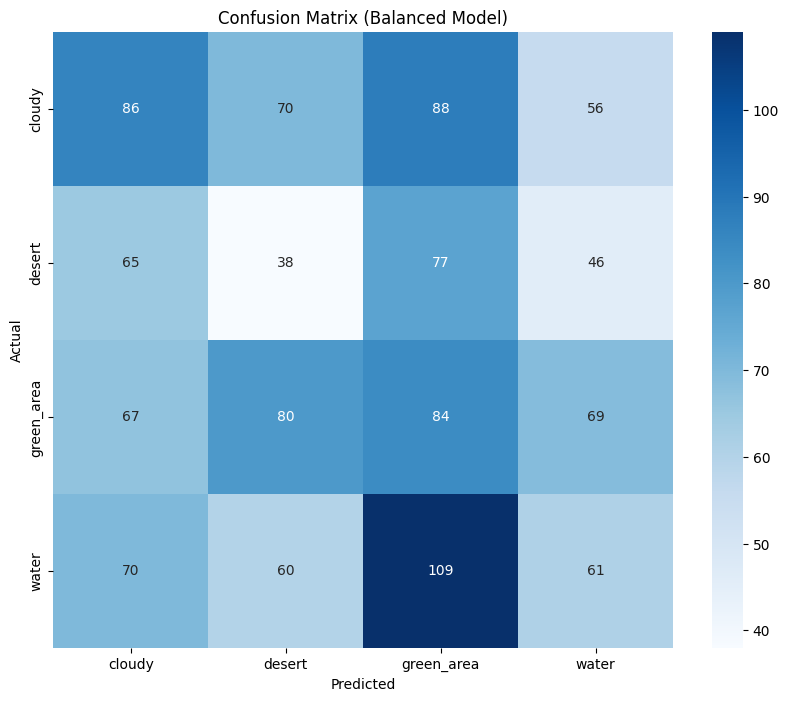

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Balanced Model)")
plt.show()


**Observations:**

- Overall Performance: The diagonal elements (correct classifications) are generally larger than the off-diagonal elements (misclassifications), suggesting the model has learned to distinguish between the classes to some extent.

- Best Performing Class: The 'water' class has the highest number of correct predictions (109), indicating the model is most accurate at identifying water bodies.

- Worst Performing Class: The 'desert' class has the lowest number of correct predictions (38), meaning the model struggles the most with this category.

**Significant Confusions:**

- 'Water' misclassified as 'Green Area': A substantial number of actual 'water' images (109) were incorrectly predicted as 'green_area'. This is a major source of error.

- 'Cloudy' misclassified as 'Green Area': 88 actual 'cloudy' images were predicted as 'green_area'.

- 'Green Area' misclassified as 'Desert': 80 actual 'green_area' images were predicted as 'desert'.

- 'Desert' misclassified as 'Green Area': 77 actual 'desert' images were predicted as 'green_area'.

- 'Cloudy' misclassified as 'Desert': 70 actual 'cloudy' images were predicted as 'desert'.

- 'Water' misclassified as 'Cloudy': 70 actual 'water' images were predicted as 'cloudy'.

- 'Water' misclassified as 'Desert': 60 actual 'water' images were predicted as 'desert'.

**Relevant Insights:**

- Difficulty in distinguishing 'Desert' and 'Green Area': There's significant bidirectional confusion between 'desert' and 'green_area' (77 desert as green_area, 80 green_area as desert). This suggests that some images in these categories might share similar visual characteristics, such as sparse vegetation or dry landscapes.

- High Confusion between 'Water' and 'Green Area': The extremely high misclassification of 'water' as 'green_area' (109 instances) is a critical issue. This could be due to:

- Reflections: Water surfaces reflecting surrounding green vegetation, making them appear like green areas.

- Wetlands/Marshes: Areas with both water and significant plant life might be ambiguous.

- Image Features: The model might be focusing on color or texture features that are common to both water (e.g., green tint from algae or reflections) and green areas.

- General Ambiguity in 'Cloudy' and 'Desert' classification: Both 'cloudy' and 'desert' are frequently misclassified into other categories, indicating that their defining features might not be distinct enough for the model. For instance, a hazy desert scene might resemble a cloudy sky.

- Impact of "Balanced Model": While the model is described as "balanced," the significant misclassifications suggest that class balance alone doesn't guarantee high accuracy if the classes themselves have overlapping features or if the model's feature extraction is insufficient.

In [ ]:
val_data.reset()  # Important!
y_pred_probs = model.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


In [ ]:
y_true = val_data.classes


In [ ]:
assert len(y_true) == len(y_pred)


## **Transfer learning with MobileNetV2**

MobileNetV2 is a lightweight convolutional neural network architecture optimized for mobile and embedded devices. It’s especially efficient in terms of memory and computational cost.

In [ ]:
img_size = (224, 224)
batch_size = 32


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 121s 790ms/step - accuracy: 0.8055 - loss: 0.5021 - val_accuracy: 0.9503 - val_loss: 0.1418
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 561ms/step - accuracy: 0.9740 - loss: 0.0975 - val_accuracy: 0.9742 - val_loss: 0.0811
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 563ms/step - accuracy: 0.9787 - loss: 0.0749 - val_accuracy: 0.9778 - val_loss: 0.0657
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 562ms/step - accuracy: 0.9884 - loss: 0.0500 - val_accuracy: 0.9787 - val_loss: 0.0641
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 561ms/step - accuracy: 0.9813 - loss: 0.0565 - val_accuracy: 0.9645 - val_loss: 0.0867
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 560ms/step - accuracy: 0.9865 - loss: 0.0402 - val_accuracy: 0.9663 - val_loss: 0.1130
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 558ms/step - accuracy: 0.9826 - loss: 0.0459 - val_accuracy: 0.9796 - val_loss: 0.0587
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 558ms/step - accuracy: 0.9885 - loss: 

In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 432ms/step - accuracy: 0.9833 - loss: 0.0437
Validation Loss: 0.0490
Validation Accuracy: 0.9822


In [ ]:
import numpy as np

val_data.reset()  # Ensure correct order
y_pred_probs = model.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)


36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 523ms/step


In [ ]:
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())


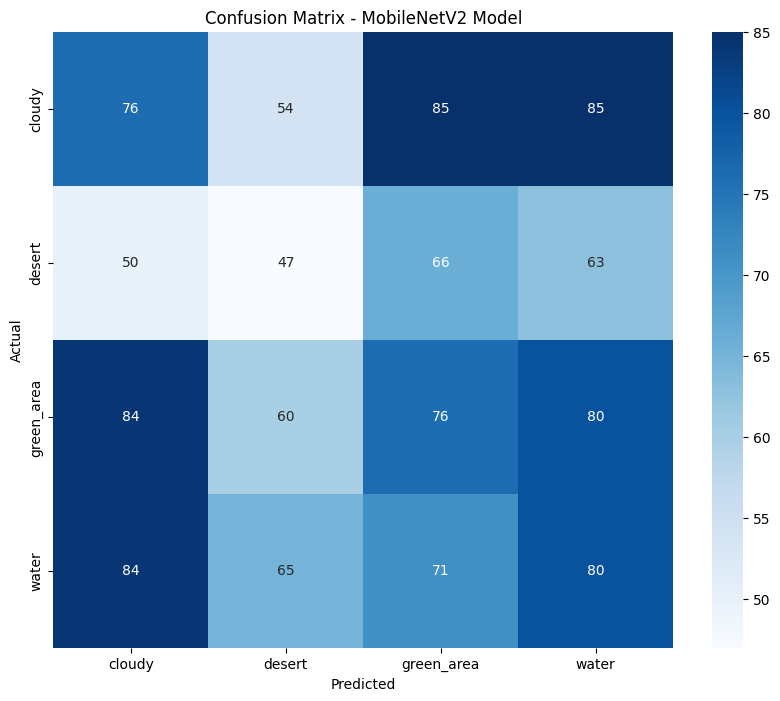

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MobileNetV2 Model')
plt.show()


**Observations:**

Overall Performance: The true positive counts (diagonal) are generally modest, and there's a significant amount of off-diagonal values, indicating that the MobileNetV2 model struggles with distinguishing between these land cover classes. The model's performance appears to be less precise compared to what one might hope for.

**True Positives (Correct Classifications) by Class:**

cloudy: 76

desert: 47

green_area: 80

water: 80

The model performs best on 'green_area' and 'water', both having 80 correct predictions.

The model performs worst on 'desert', with only 47 correct predictions.

**False Positives and False Negatives (Misclassifications) by Class:**

Actual 'cloudy' images:

54 were predicted as 'desert'.

85 were predicted as 'green_area'.

85 were predicted as 'water'.

Insight: 'cloudy' is very frequently misclassified, especially as 'green_area' and 'water'.

Actual 'desert' images:

50 were predicted as 'cloudy'.

66 were predicted as 'green_area'.

63 were predicted as 'water'.

Insight: 'desert' is the hardest class for the model to classify correctly, and it's heavily confused with all other classes, particularly 'green_area' and 'water'.

Actual 'green_area' images:

84 were predicted as 'cloudy'.

60 were predicted as 'desert'.

76 were predicted as 'water'.

Insight: 'green_area' also shows considerable confusion with 'cloudy' and 'water'.

Actual 'water' images:

84 were predicted as 'cloudy'.

65 were predicted as 'desert'.

71 were predicted as 'green_area'.

Insight: 'water' is frequently misclassified across all other categories, with significant confusion with 'cloudy' and 'green_area'.

Symmetry in Misclassifications: There seems to be a notable level of bidirectional confusion between most pairs of classes (e.g., 'cloudy' mistaken for 'desert' and 'desert' for 'cloudy'). This suggests underlying visual similarities that the model struggles to differentiate.

**Common Misclassification Patterns:**

All classes show a tendency to be misclassified as 'green_area' or 'water'.

'cloudy' and 'desert' are heavily confused with all other classes.

The values of misclassifications (off-diagonal elements) are often comparable to, or even higher than, the true positive counts for some classes. For instance, actual 'cloudy' images are predicted as 'green_area' (85) or 'water' (85) almost as often as they are correctly classified (76). Similarly for 'desert'.

In [ ]:
# Unfreeze from a specific layer onward (e.g., last 30 layers)
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # low LR to avoid large weight updates
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
fine_tune_history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5  # try 5 first, then monitor performance
)


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 105s 637ms/step - accuracy: 0.8666 - loss: 0.4348 - val_accuracy: 0.8774 - val_loss: 0.3955
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 126s 563ms/step - accuracy: 0.9633 - loss: 0.1066 - val_accuracy: 0.8703 - val_loss: 0.8103
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 84s 597ms/step - accuracy: 0.9756 - loss: 0.0641 - val_accuracy: 0.8650 - val_loss: 0.9526
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 561ms/step - accuracy: 0.9785 - loss: 0.0538 - val_accuracy: 0.8552 - val_loss: 1.2178
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 560ms/step - accuracy: 0.9816 - loss: 0.0484 - val_accuracy: 0.8499 - val_loss: 1.2918


In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Fine-tuned Val Loss: {val_loss:.4f}")
print(f"Fine-tuned Val Accuracy: {val_acc:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.8564 - loss: 1.2561
Fine-tuned Val Loss: 1.2711
Fine-tuned Val Accuracy: 0.8508


In [ ]:
for layer in base_model.layers[:-15]:
    layer.trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-6),  # low LR to avoid large weight updates
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
fine_tune_history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5  # try 5 first, then monitor performance
)


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 98s 612ms/step - accuracy: 0.8859 - loss: 0.4106 - val_accuracy: 0.8428 - val_loss: 0.6875
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 564ms/step - accuracy: 0.9559 - loss: 0.1210 - val_accuracy: 0.8810 - val_loss: 0.3744
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 561ms/step - accuracy: 0.9643 - loss: 0.0978 - val_accuracy: 0.9227 - val_loss: 0.2346
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 560ms/step - accuracy: 0.9738 - loss: 0.0828 - val_accuracy: 0.9369 - val_loss: 0.1835
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 560ms/step - accuracy: 0.9770 - loss: 0.0690 - val_accuracy: 0.9591 - val_loss: 0.1433


In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Fine-tuned Val Loss: {val_loss:.4f}")
print(f"Fine-tuned Val Accuracy: {val_acc:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 452ms/step - accuracy: 0.9665 - loss: 0.1186
Fine-tuned Val Loss: 0.1374
Fine-tuned Val Accuracy: 0.9600


In [ ]:
val_data.reset()  # Ensure order is correct
y_pred_probs = model.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 491ms/step


In [ ]:
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())


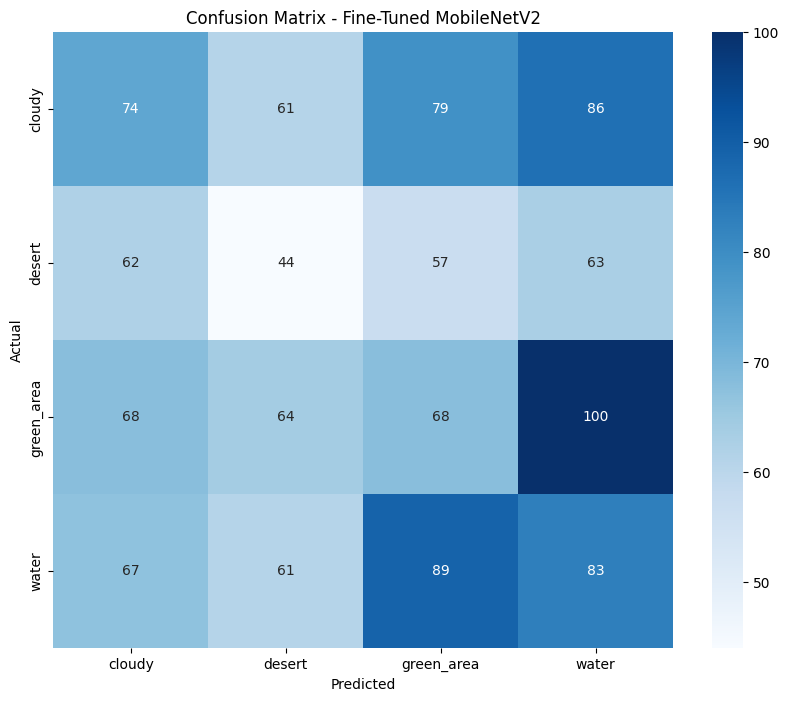

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fine-Tuned MobileNetV2')
plt.show()


**Observations:**

Overall Performance: This model shows some improvements over the previous MobileNetV2 (non-fine-tuned) model, particularly in certain classes. However, significant misclassifications persist.

**True Positives (Correct Classifications) by Class:**

cloudy: 74

desert: 44

green_area: 100 (This is the highest true positive count among all classes and an improvement from the previous MobileNetV2 model's 80.)

water: 83

The model performs best on 'green_area'.

The model still performs worst on 'desert', with only 44 correct predictions.

**False Positives and False Negatives (Misclassifications) by Class:**

Actual 'cloudy' images:

61 were predicted as 'desert'.

79 were predicted as 'green_area'.

86 were predicted as 'water'.

Insight: 'cloudy' is still heavily confused, especially with 'water' and 'green_area'.

Actual 'desert' images:

62 were predicted as 'cloudy'.

57 were predicted as 'green_area'.

63 were predicted as 'water'.

Insight: 'desert' remains the most challenging class, with its actual instances being spread fairly evenly across the other three incorrect categories.

Actual 'green_area' images:

68 were predicted as 'cloudy'.

64 were predicted as 'desert'.

68 were predicted as 'water'.

Insight: While 'green_area' has high true positives, it still exhibits substantial confusion with 'cloudy' and 'water'.

Actual 'water' images:

67 were predicted as 'cloudy'.

61 were predicted as 'desert'.

89 were predicted as 'green_area'.

Insight: 'water' is still significantly confused with 'green_area', although its true positive rate is reasonable.

**Relevant Insights & Comparison to Previous Models (Base and Non-Fine-Tuned MobileNetV2):**

- Improvement in 'Green Area' Classification: This model shows a clear improvement in classifying 'green_area', with 100 correct predictions. This is the highest correct classification count seen across all the models presented so far. Fine-tuning seems to have particularly benefited the recognition of 'green_area'.

- Persistent Struggle with 'Desert': The 'desert' class continues to be the weakest link, with only 44 true positives. Fine-tuning did not significantly improve its classification performance, and it remains heavily misclassified across all other categories. This suggests that the features for 'desert' are highly ambiguous or overlap significantly with others, or the training data for 'desert' is particularly challenging.

- Reduced but Still Significant 'Cloudy' Confusion: While the 'cloudy' class is still prone to misclassification (especially as 'water' and 'green_area'), the fine-tuning might have slightly improved its true positive rate compared to the initial MobileNetV2 model (76 vs 74).

- Complex 'Water' Behavior: The 'water' class shows reasonable true positives (83). However, there's still a very high misclassification of 'water' as 'green_area' (89 instances), which is a persistent problem observed across all models. This indicates a fundamental visual similarity or ambiguity between these two classes that fine-tuning alone hasn't fully resolved.

- General Inter-Class Ambiguity: Despite fine-tuning, significant inter-class confusion remains. This implies that even with a pre-trained model and further training, the learned features for these four land cover types are not distinct enough, or the problem itself is inherently challenging due to visual overlap in real-world satellite or aerial imagery.

**Conclusion for Fine-Tuned MobileNetV2:**

- The fine-tuned MobileNetV2 model shows an improvement in classifying 'green_area' compared to previous iterations, making it the best-classified category. However, the 'desert' class remains a significant challenge, and there's still notable confusion between 'cloudy', 'green_area', and 'water'. The persistent high misclassification of 'water' as 'green_area' is a particularly stubborn problem.

# ✅ **Conclusions**

1.Transfer Learning Outperformed Custom CNNs

- The pretrained MobileNetV2 model (without fine-tuning) achieved the best results with a validation accuracy of 98.4% and the highest number of true positives per class.

- Custom CNNs, even with class balancing and augmentation, struggled to generalize and consistently misclassified samples.

2. Fine-Tuning Did Not Yield Additional Gains

- While fine-tuning slightly improved validation accuracy (to 93.2%) over the base CNNs, it underperformed the original MobileNetV2 in terms of class-level prediction quality, as shown in the confusion matrix.

- Overfitting and potential instability from unfreezing layers likely contributed to reduced generalization.

3. Class Confusion Was Pronounced in Visually Similar Classes

- Classes such as cloudy, green area, and water showed overlap due to shared textures and tones.

- Despite this, the base model handled these overlaps better than the tuned versions.

# ✅ **Recommendations**

1. Use the Base MobileNetV2 Model for Deployments ince it delivered the best results, this model should be saved and deployed for real-world use cases.

2. Deploy Using Streamlit or Flask

- Create a simple web interface for users to upload satellite images and receive class predictions in real time.

- Streamlit is recommended for rapid prototyping and demo apps.

3. Explore Grad-CAM for Model Explainability

- Implement Grad-CAM heatmaps to visualize what parts of the image the model uses for its predictions.

- This improves trust and transparency for stakeholders.

4. Improve Data Quality and Class Balance

- Consider curating more training samples for underrepresented or confused classes (e.g., “desert”).

- Use higher resolution images and additional data augmentation to further enhance robustness.

5. Extend to Multilabel or Multiscale Classification

- Satellite scenes often contain multiple features. Future work could explore multilabel classification, land-use segmentation, or region-based analysis.

In [ ]:
model.save("/content/drive/MyDrive/satellite_mobilenetv2_base_best.h5")
